**Question 1** 

---


You are provided with a URL. This webpage includes a table on individuals' income and shopping habits – this webpage was created for exercise purposes.

Using Beautiful Soup, scrape the table and convert it into a pandas dataframe. Perform data cleaning when necessary to remove extra characters (no need to handle missing values).


**Solution**


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from urllib.request import urlopen 
from bs4 import BeautifulSoup

url = " http://eecs.qmul.ac.uk/~emmanouilb/income_table.html" 
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
rows = soup.find_all('tr') 
for row in rows:
  row_td = row.find_all('td')
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()

# Create an empty list where the table header will be stored
header_list = []

# Find the 'th' html tags which denote table header
col_labels = soup.find_all('th')
col_str = str(col_labels)
cleantext_header = BeautifulSoup(col_str, "lxml").get_text() # e xtract the text without HTML tags 
header_list.append(cleantext_header) # Add the clean table header to the list

# Create an empty list where the table will be stored
table_list = []

# For every row in the table, find each cell element and add it to the list
for row in rows:
  row_td = row.find_all('td') 
  row_cells = str(row_td)
  row_cleantext = BeautifulSoup(row_cells, "lxml").get_text() # extract the text without HTML tags
  table_list.append(row_cleantext) # Add the clean table row t o the list

df_header = pd.DataFrame(header_list)
df_header2 = df_header[0].str.split(',', expand=True) 
df_table = pd.DataFrame(table_list)
df_table2 = df_table[0].str.split(',', expand=True)

# Remove uneccesary characters
df_table2[0] = df_table2[0].str.strip('[') 
df_table2[0] = df_table2[0].str.strip(']') 
df_table2[3] = df_table2[3].str.strip(']')

# We remove uneccessary characters from the header
df_header2[0] = df_header2[0].str.strip('[') 
df_header2[3] = df_header2[3].str.strip(']')

# We concatenate the two dataframes
frames = [df_header2, df_table2]
df = pd.concat(frames)
df2 = df.rename(columns=df.iloc[0]) # We assign the first row to be the dataframe header
df3 = df2.drop(df2.index[0])
df3.head(10)

,Region,Age,Income,Online Shopper
1,India,49,86400,No
2,Brazil,32,57600,Yes
3,USA,35,64800,No
4,Brazil,43,73200,No
5,USA,45,,Yes
6,India,40,69600,Yes
7,Brazil,,62400,No
8,India,53,94800,Yes
9,USA,55,99600,No
10,India,42,80400,Yes


**Question 2**

---


Consider the graph in the figure below as displaying the links for a group of 5 webpages.
1.	Which of the 5 nodes would you consider hubs and which would you consider authorities? Explain why. [0.5 marks out of 5]
2.	Assume that this graph is to be used as input to the PageRank algorithm. Calculate the transition probabilities 𝑝𝑖𝑗 for all 5 nodes in the below graph (where 𝑖 and 𝑗 take values between 1 to 5). Add transitions with a uniform probability distribution in the case of dead-end nodes (do not consider cases of dead-end components). [1 mark out of 5].
3.	Derive the PageRank 𝜋(𝑖) for all nodes, where 𝑖={1,...,5} corresponds to the node index. Assume that the teleportation probability is set to 𝛼.


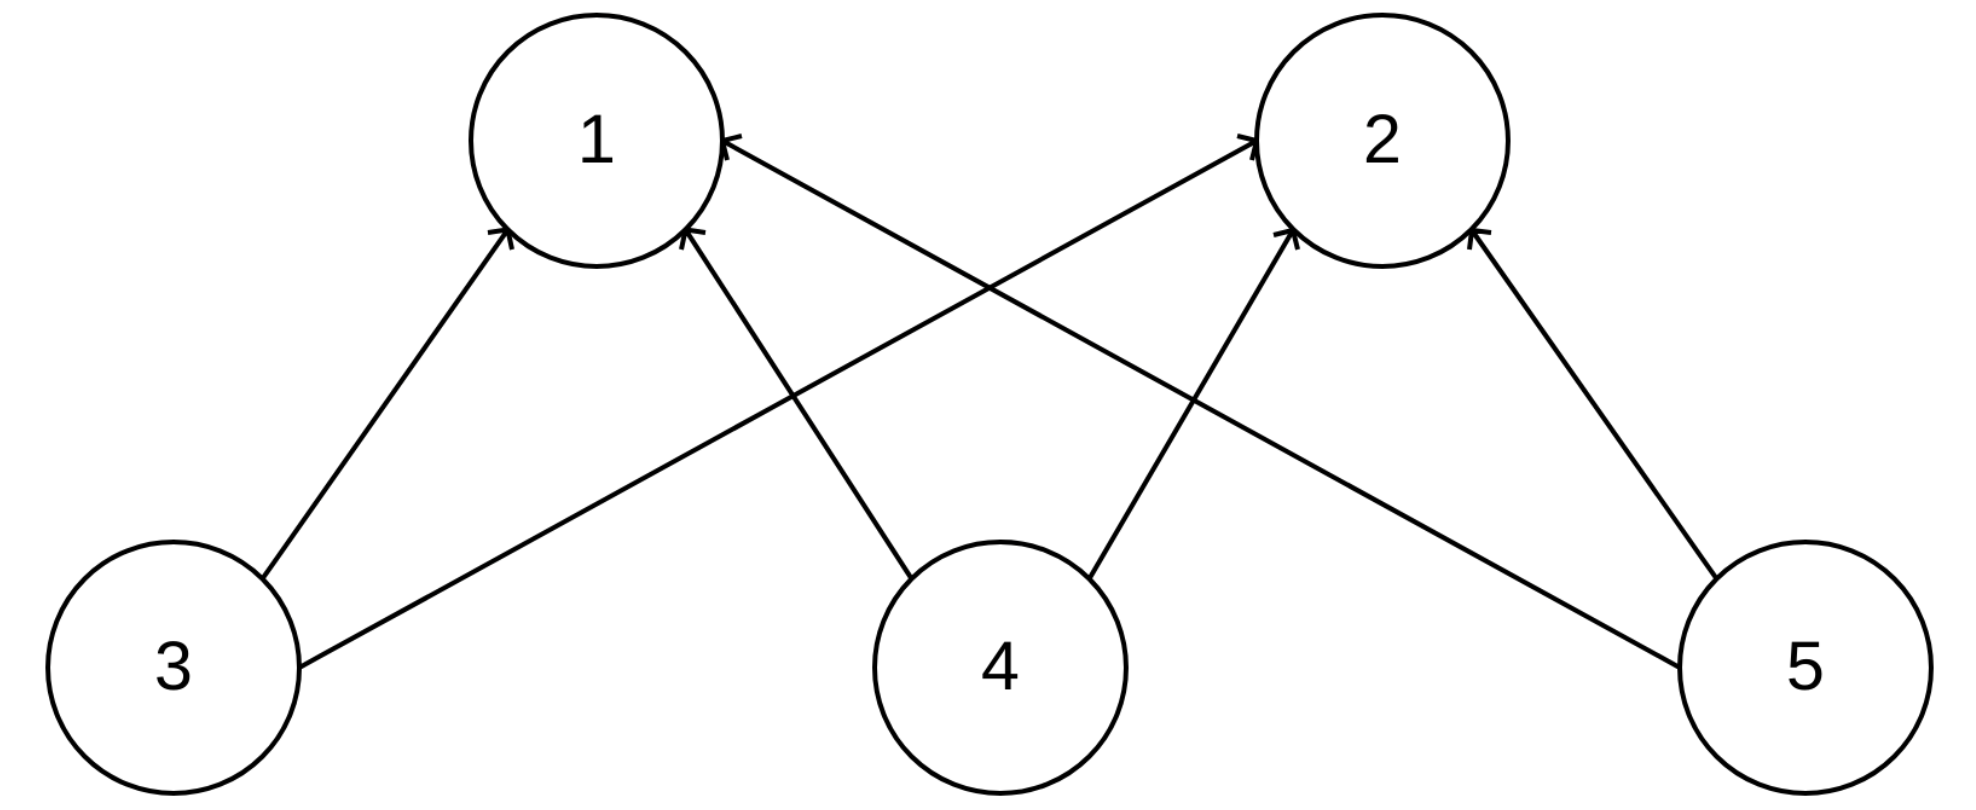

In [ ]:
#from IPython.display import Image
#Image(filename='Graph1.jpg', width=500)

**Solution**

---


1.	Node 1 and node 2 are authorities because they have many in-links. Node 3, node 4 and node 5 are hubs, because they have many out-links to authorities.

2.	*Calculate transition probabilities*
   

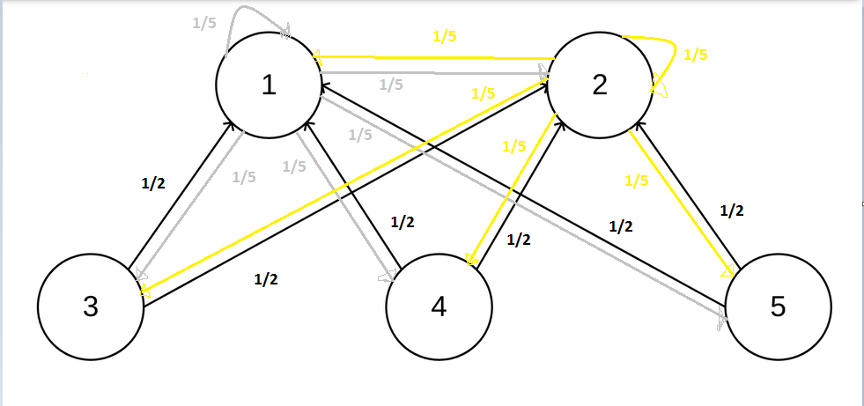

In [ ]:
#Image(filename='Graph2.jpg', width=600)

•	p11=1/5, p12=1/5, p13=1/5, p14=1/5, p15=1/5

•	p21=1/5, p22=1/5, p23=1/5, p24=1/5, p25=1/5

•	p31=1/2, p32=1/2, p34=0, p35=0

•	p41=1/2, p42=1/2, p43=0, p45=0

•	p51=1/2, p52=1/2, p53=0, p54=0

3.	*Derive the PageRank for all nodes*

•	Node 1: π(1) = α/5 + (1 – α) * (π(1)/5 + π(2)/5 + π(3)/2 + π(4)/2 + π(5)/2)

•	Node 2: π(2) = α/5 + (1 – α) * (π(1)/5 + π(2)/5 + π(3)/2 + π(4)/2 + π(5)/2) 

•	Node 3: π(3) =α/5+ (1– α)*(π(1)/5+π(2)/5+ π(4)* 0 +π(5) * 0)

•	Node 4: π(4) =α/5+ (1– α)*(π(1)/5+π(2)/5+ π(4)* 0 +π(5) * 0)

•	Node 5: π(5) =α/5+ (1– α)*(π(1)/5+π(2)/5+ π(4)* 0 +π(5) * 0)
